In [ ]:
# Question 1
# Apply Linear Regression to the provided dataset using underlying steps. 
#     a. Import the given “Salary_Data.csv” 
#     b. Split the data in train_test partitions, such that 1/3 of the data is reserved as test subset. 
#     c. Train and predict the model.  
#     d. Calculate the mean_squared error e. Visualize both train and test data using scatter plot. 

In [5]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing the datasets
 
dataframe = pd.read_csv('datasets//Salary_Data.csv')
print("\ndataframe.info, information about features")
dataframe.info()


dataframe.info, information about features
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
dataframe.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [7]:
dataframe.corr().style.background_gradient(cmap="Greens")

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


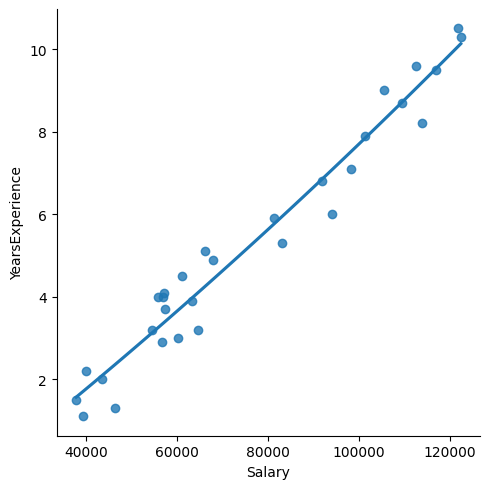

In [8]:
sns.lmplot(x ="Salary", y ="YearsExperience", data = dataframe, order = 2, ci = None)

In [ ]:
#cleaning the data
dataframe.fillna(method ='ffill', inplace = True)

X = np.array(dataframe['Salary']).reshape(-1, 1)
y = np.array(dataframe['YearsExperience']).reshape(-1, 1)

# Dropping any rows with Nan values
dataframe.dropna(inplace = True)

import sklearn
# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)
  

linearRegression_Classifier = LinearRegression()
linearRegression_Classifier.fit(X_train, y_train)
y_trainPred = linearRegression_Classifier.predict(X_train)
#Score of test data
print("Score: ",linearRegression_Classifier.score(X_train, y_train))
plt.scatter(X_train, y_train, color ='b')
plt.show()

In [ ]:
y_pred = linearRegression_Classifier.predict(X_test)
#Score of test data
print("Score: ",linearRegression_Classifier.score(X_test, y_test))
print("Score: ",linearRegression_Classifier.score(X_test, y_pred))

plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
plt.show()

In [ ]:

from sklearn.metrics import mean_absolute_error,mean_squared_error
  
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
  
print("mean_absolute_error:",mae)
print("mean_squared_error:",mse)
print("RMSE(mean_squared_error):",rmse)

In [ ]:
# Question2 
# Apply K means clustering in the dataset provided:  
#     • Remove any null values by the mean.
#     • Use the elbow method to find a good number of clusters with the K-Means algorithm
#     • Calculate the silhouette score for the above clustering 

In [ ]:
import pandas as pd
dataframe1 = pd.read_csv('datasets//K-Mean_Dataset.csv')
dataframe1.info()
dataframe1.isnull().any()

In [ ]:
dataframe1.head()

In [ ]:
dataframe1.isnull().any()